In [2]:
import numpy as np
import ZebraLib as zb
import pandas as pd
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import itertools

In [24]:
it = int(50)

Cr = np.linspace(0.1, 0.8, it)
Af = np.linspace(0.1, 0.95, it)
b = np.linspace(1, 3.5, it)

A = (list(itertools.product(Cr, Af, b)))

Cr_list, Af_list, b_list, Cp_list, Cm_list = [], [], [], [], []
for elem in A:
    Cr_list.append(elem[0])
    Af_list.append(elem[1])
    b_list.append(elem[2])
    Cp_list.append(elem[0]*elem[1])
    Cm_list.append((2/3)*elem[0]*((1+elem[1]+elem[1]**2)/(1+elem[1])))

df = pd.DataFrame({'Cr':Cr_list, 'Cp':Cp_list, 'Cm':Cm_list, 'Af':Af_list, 'b':b_list})
df['S'] = (df['Cr']+df['Cp'])*df['b']
df['AR'] = df['b']/df['Cm']
df.describe()

,Cr,Cp,Cm,Af,b,S,AR
count,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000
mean,0.450000,0.236250,0.359795,0.525000,2.250000,1.544063,8.627252
std,0.206156,0.164522,0.171025,0.250332,0.736272,0.946203,6.847712
min,0.100000,0.010000,0.067273,0.100000,1.000000,0.110000,1.281770
25%,0.271429,0.102325,0.214390,0.308163,1.612245,0.798818,4.222456
50%,0.450000,0.195284,0.355278,0.525000,2.250000,1.348681,6.336047
75%,0.628571,0.338644,0.496255,0.741837,2.887755,2.112495,10.501652
max,0.800000,0.760000,0.780171,0.950000,3.500000,5.460000,52.027027


array([[<AxesSubplot:title={'center':'Cr'}>,
        <AxesSubplot:title={'center':'Cp'}>,
        <AxesSubplot:title={'center':'Cm'}>],
       [<AxesSubplot:title={'center':'Af'}>,
        <AxesSubplot:title={'center':'b'}>,
        <AxesSubplot:title={'center':'S'}>],
       [<AxesSubplot:title={'center':'AR'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

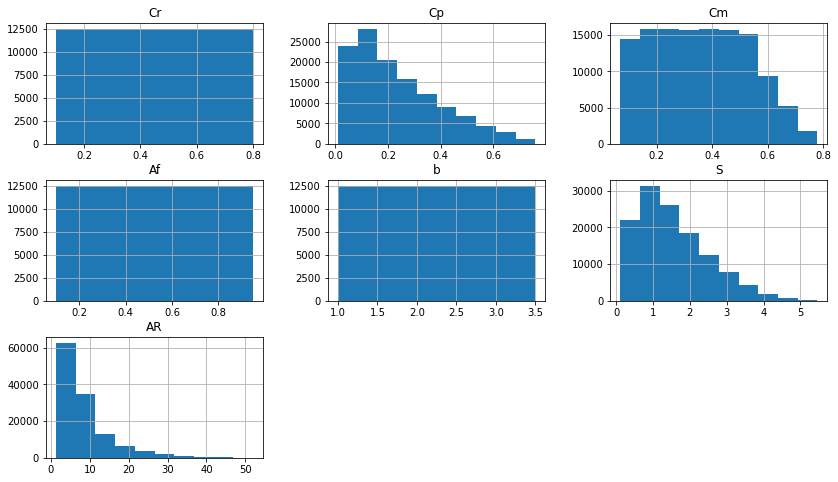

In [32]:
df.hist(figsize=(14, 8))

In [50]:
filtro = df[(df['AR']<=6) & (df['S']<= 2)]
filtro

,Cr,Cp,Cm,Af,b,S,AR
14950,0.171429,0.162857,0.167179,0.950000,1.000000,0.334286,5.981595
17000,0.185714,0.147434,0.167307,0.793878,1.000000,0.333149,5.977021
17050,0.185714,0.150656,0.168794,0.811224,1.000000,0.336370,5.924377
17100,0.185714,0.153878,0.170293,0.828571,1.000000,0.339592,5.872219
17150,0.185714,0.157099,0.171805,0.845918,1.000000,0.342813,5.820559
...,...,...,...,...,...,...,...
124951,0.800000,0.760000,0.780171,0.950000,1.051020,1.639592,1.347167
124952,0.800000,0.760000,0.780171,0.950000,1.102041,1.719184,1.412563
124953,0.800000,0.760000,0.780171,0.950000,1.153061,1.798776,1.477960
124954,0.800000,0.760000,0.780171,0.950000,1.204082,1.878367,1.543356


In [51]:
filtro = filtro[0:100]

N, Slo = [], []
for x in tqdm(range(len(filtro.index))):
    Zb = zb.Airplane()
    Zb.b = filtro['b'].iloc[x]; Zb.AR = filtro['AR'].iloc[x] 
    Zb.c = filtro['Cm'].iloc[x]; Zb.Af = filtro['Af'].iloc[x]; Zb.S = filtro['S'].iloc[x]
    Zb.params_Calc

    N.append(Zb.save('D:/Aviões_gerados_x2.xlsx', False))
    Slo.append(Zb.takeOff_Distance_AproxMiranda())

df2 = pd.DataFrame(N)
df2['Slo'] = Slo
df2

100%|██████████| 100/100 [00:04<00:00, 24.80it/s]


,ano,nome,b,S,Af,AR,CLn,CLmax,Swet,c,...,Tc_2,mi,mv,Nmax,z,I,xw,xm,xn,Slo
0,2021,Zb 2021,1.000000,0.334286,0.950000,5.981595,1.08,1.528888,10,0.167179,...,35.225,0.038,2.8,2.1,0.22,1,0,0.25,0.15,85.618735
1,2021,Zb 2021,1.000000,0.333149,0.793878,5.977021,1.08,1.534082,10,0.167307,...,35.225,0.038,2.8,2.1,0.22,1,0,0.25,0.15,85.416566
2,2021,Zb 2021,1.000000,0.336370,0.811224,5.924377,1.08,1.530171,10,0.168794,...,35.225,0.038,2.8,2.1,0.22,1,0,0.25,0.15,84.551368
3,2021,Zb 2021,1.000000,0.339592,0.828571,5.872219,1.08,1.526245,10,0.170293,...,35.225,0.038,2.8,2.1,0.22,1,0,0.25,0.15,83.715882
4,2021,Zb 2021,1.000000,0.342813,0.845918,5.820559,1.08,1.522303,10,0.171805,...,35.225,0.038,2.8,2.1,0.22,1,0,0.25,0.15,82.908945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021,Zb 2021,1.000000,0.391837,0.828571,5.089257,1.08,1.474498,10,0.196492,...,35.225,0.038,2.8,2.1,0.22,1,0,0.25,0.15,72.013135
96,2021,Zb 2021,1.051020,0.411828,0.828571,5.348913,1.08,1.494217,10,0.196492,...,35.225,0.038,2.8,2.1,0.22,1,0,0.25,0.15,64.640879
97,2021,Zb 2021,1.102041,0.431820,0.828571,5.608569,1.08,1.508776,10,0.196492,...,35.225,0.038,2.8,2.1,0.22,1,0,0.25,0.15,58.833582
98,2021,Zb 2021,1.153061,0.451812,0.828571,5.868225,1.08,1.525989,10,0.196492,...,35.225,0.038,2.8,2.1,0.22,1,0,0.25,0.15,53.766919


In [59]:
analise = df2[['b', 'S', 'Af', 'AR', 'c', 'CLmax', 'Slo']]
analise.describe()

,b,S,Af,AR,c,CLmax,Slo
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.038776,0.379673,0.791969,5.661354,0.183689,1.514104,72.278375
std,0.045357,0.031146,0.108791,0.246116,0.008517,0.017119,8.794944
min,1.000000,0.324927,0.516327,5.044485,0.167179,1.470335,53.766919
25%,1.000000,0.355601,0.724490,5.499095,0.176961,1.502327,66.147318
50%,1.051020,0.377024,0.802551,5.702748,0.184702,1.516916,72.461644
75%,1.051020,0.402740,0.880612,5.863685,0.191347,1.527713,79.663748
max,1.153061,0.451812,0.950000,5.996688,0.198236,1.542426,88.054205


In [62]:
idx = analise['Slo'].idxmin()
analise[analise.index==idx]

,b,S,Af,AR,c,CLmax,Slo
98,1.153061,0.451812,0.828571,5.868225,0.196492,1.525989,53.766919


In [66]:
av_otimo = df2[df2.index==idx]

In [ ]:
Zb = zb.Airplane(file=av_otimo)
Zb.info()

In [46]:
filtro = df[(df['SLO'] <= 24.5) & (df['b'] <= 2) & (df['c'] <= 0.3)]
filtro

,ano,nome,b,S,Af,AR,CLn,CLmax,Swet,c,...,Tc_2,mi,mv,Nmax,z,I,xw,xm,xn,SLO
425,2021,Zb 2021,1.048499,0.843,0.254773,3.942082,1.08,1.560132,10,0.265976,...,35.225,0.038,2.8,2.1,0.22,1,0,0.25,0.15,24.321717
637,2021,Zb 2021,1.111481,0.843,0.249213,3.917312,1.08,1.557492,10,0.283736,...,35.225,0.038,2.8,2.1,0.22,1,0,0.25,0.15,24.403046
741,2021,Zb 2021,1.153021,0.843,0.197385,3.948220,1.08,1.560782,10,0.292036,...,35.225,0.038,2.8,2.1,0.22,1,0,0.25,0.15,24.316840
762,2021,Zb 2021,1.045674,0.843,0.856590,3.946193,1.08,1.560568,10,0.264983,...,35.225,0.038,2.8,2.1,0.22,1,0,0.25,0.15,24.382744
966,2021,Zb 2021,1.052682,0.843,0.390686,3.929279,1.08,1.558771,10,0.267907,...,35.225,0.038,2.8,2.1,0.22,1,0,0.25,0.15,24.354957
1124,2021,Zb 2021,1.139151,0.843,0.958485,3.922626,1.08,1.558061,10,0.290405,...,35.225,0.038,2.8,2.1,0.22,1,0,0.25,0.15,24.486592
1222,2021,Zb 2021,1.059368,0.843,0.176072,3.970779,1.08,1.563156,10,0.266791,...,35.225,0.038,2.8,2.1,0.22,1,0,0.25,0.15,24.252944
1443,2021,Zb 2021,1.076999,0.843,0.799940,3.942949,1.08,1.560224,10,0.273146,...,35.225,0.038,2.8,2.1,0.22,1,0,0.25,0.15,24.379983
1786,2021,Zb 2021,1.134849,0.843,0.411837,3.960097,1.08,1.562035,10,0.286571,...,35.225,0.038,2.8,2.1,0.22,1,0,0.25,0.15,24.257460
1906,2021,Zb 2021,1.052601,0.843,0.960813,3.990525,1.08,1.565216,10,0.263775,...,35.225,0.038,2.8,2.1,0.22,1,0,0.25,0.15,24.269675


<AxesSubplot:>

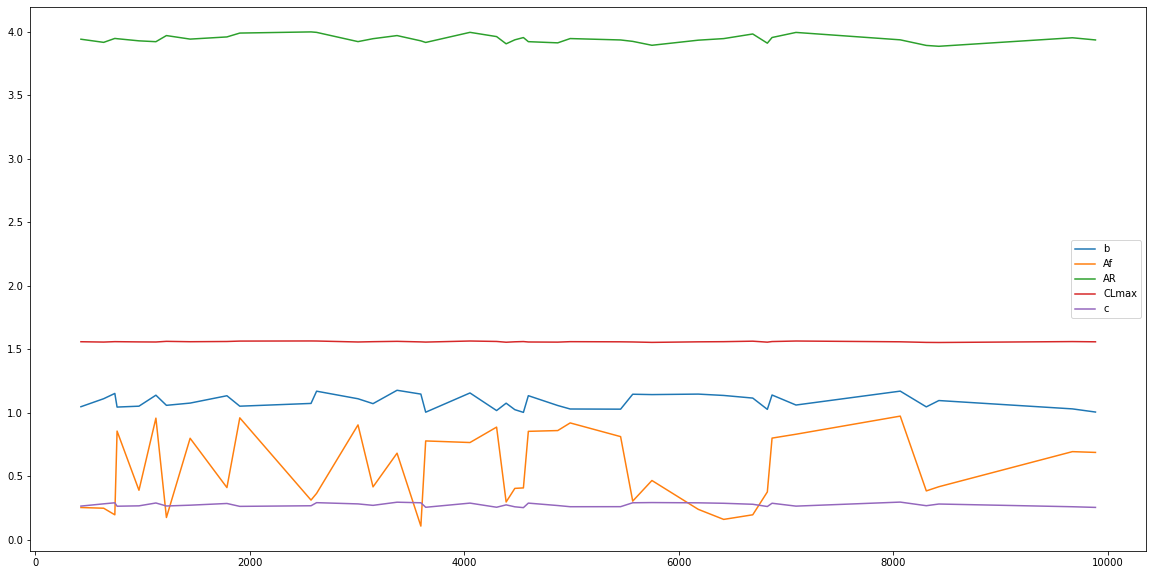

In [58]:
filtro2 = filtro[['b',  'Af', 'AR', 'CLmax', 'c']]
filtro2.plot(figsize=(20, 10))

In [52]:
filtro[filtro.index==4550]

,ano,nome,b,S,Af,AR,CLn,CLmax,Swet,c,...,Tc_2,mi,mv,Nmax,z,I,xw,xm,xn,SLO
4550,2021,Zb 2021,1.003919,0.843,0.40915,3.955173,1.08,1.561516,10,0.253824,...,35.225,0.038,2.8,2.1,0.22,1,0,0.25,0.15,24.272905


In [55]:
G = zb.Airplane(file=filtro[filtro.index==4550])
G.info()

C:\Users\arthu\anaconda3\ZebraLib\zebralib\zebraperformance.py:1742: RuntimeWarning: invalid value encountered in arcsin
  theta = np.degrees(np.arcsin(RC / V))


,Zb 2021
Alt-dens [m],0
Densidade [Kg/m^3],1.225
Informações de carga,---------
Carga_paga,5.5
Carga_vazia,2.8
Carga_total,8.4
Peso_total,82.404
Parâmetros críticos,---------
S,0.843
b,1.003919


In [ ]:
df_f = df[['b', 'Af', 'AR', 'c', 'S', 'CLmax', 'SLO']]
df_f

<AxesSubplot:xlabel='SLO', ylabel='AR'>

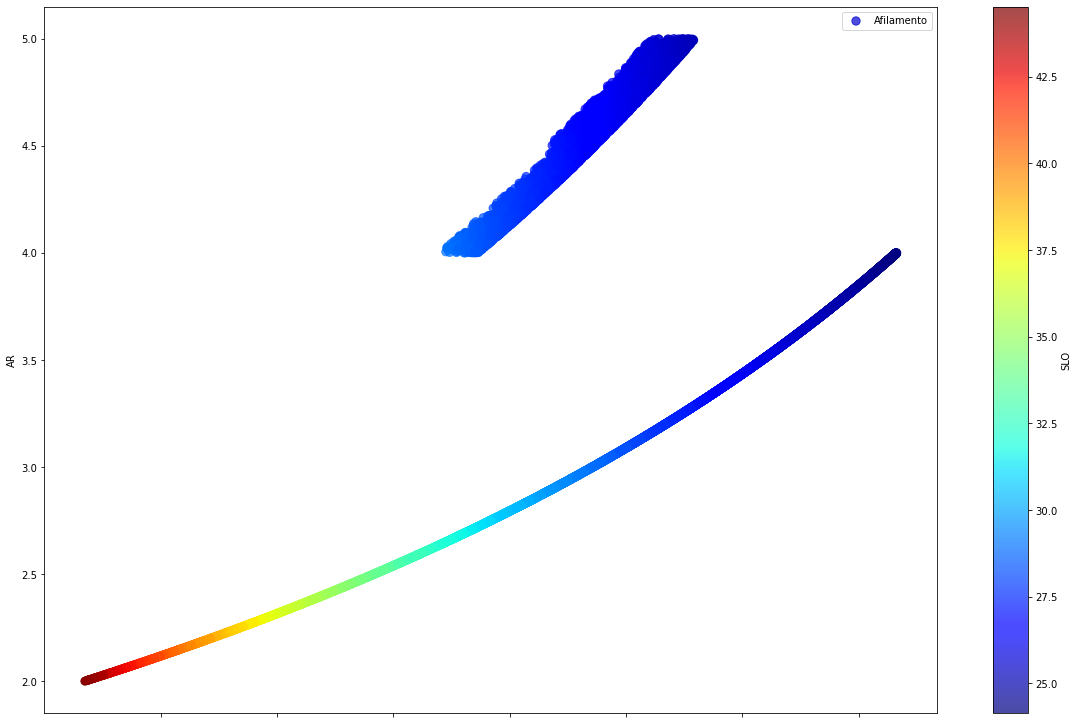

In [64]:
df.plot(kind='scatter', x='CLmax', y='AR', alpha=.7, 
            s=df['CLmax']*50, label='Afilamento', figsize=(20,13), 
            c='SLO', cmap=plt.get_cmap('jet'), colorbar=True, xlabel='SLO')